In [1]:
import jyro.simulator as jy
import conx as cx
from random import shuffle

Using Theano backend.
Conx, version 3.6.0


In [2]:
def get_inputs_targets(num_sensors, filename):
    fp = open(filename, "r")
    left_pats = []
    right_pats = []
    straight_pats = []
    for line in fp:
        data = [float(v) for v in line.split()]
        if data[-1] > 0:
            left_pats.append((data[:num_sensors], data[num_sensors:]))
        elif data[-1] < 0:
            right_pats.append((data[:num_sensors], data[num_sensors:]))
        else:
            straight_pats.append((data[:num_sensors], data[num_sensors:]))
    shuffle(left_pats)
    shuffle(right_pats)
    shuffle(straight_pats)
    fewest = min(len(left_pats), len(right_pats), len(straight_pats))
    patterns = left_pats[:fewest] + right_pats[:fewest] + straight_pats[:fewest]
    print("Created a balanced data set of %d patterns" % len(patterns))
    return patterns

In [3]:
patterns = get_inputs_targets(2, "training_data.txt")
print("First pattern", patterns[0])
print("Input:  ", patterns[0][0])
print("Target: ", patterns[0][1])

Created a balanced data set of 1317 patterns
First pattern ([0.863, 0.812], [0.0, 0.3])
Input:   [0.863, 0.812]
Target:  [0.0, 0.3]


In [4]:
def check_balance(patterns):
    left = 0
    right = 0
    straight = 0
    for inp, tar in patterns:
        if tar[1] < 0:
            right += 1
        elif tar[1] > 0:
            left += 1
        else:
            straight += 1
    total = left + right + straight
    if total != len(patterns):
        print("We have a problem!")
    print("left: %.2f right: %.2f straight: %.2f" % (left/total, right/total, straight/total))
    
check_balance(patterns)

left: 0.33 right: 0.33 straight: 0.33


In [5]:
def light_network(num_sensors, actf):
    net = cx.Network("Find Light Controller")
    net.add(cx.Layer("input", num_sensors),
            cx.Layer("hidden1", 5, activation=actf),
            cx.Layer("hidden2", 5, activation=actf),
            cx.Layer("output", 2, activation=actf))
    net.connect()
    net.compile(loss="mse", optimizer="SGD", lr=0.1,momentum=0.0)
    net.summary()
    return net

net = light_network(2, "tanh")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 5)                 15        
_________________________________________________________________
hidden2 (Dense)              (None, 5)                 30        
_________________________________________________________________
output (Dense)               (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [6]:
net.dataset.clear()
net.dataset.load(patterns)
net.dataset.shuffle()
#net.dataset.split(.2) # use 80% for training, 20% for testing
net.dataset.summary()

_________________________________________________________________
Find Light Controller Dataset:
Patterns    Shape                 Range                         
inputs      (2,)                  (0.011, 0.9)                  
targets     (2,)                  (-0.3, 0.3)                   
Total patterns: 1317
   Training patterns: 1317
   Testing patterns: 0
_________________________________________________________________


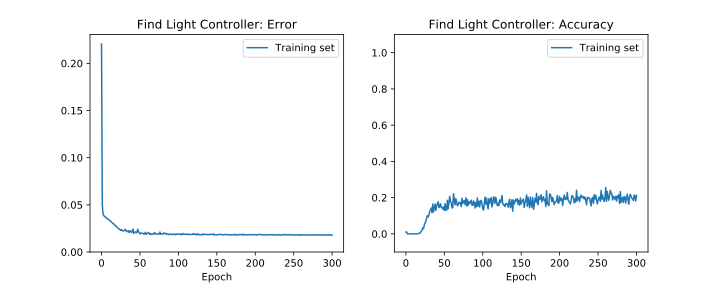

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  300 |   0.01793 |   0.21336 


In [7]:
net.reset() # resets weights, starts training from scratch
net.train(epochs=300, report_rate=10)

In [8]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=0.5, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'hidden1', 'hidden2', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AAK8AANAAAAIC8wAAbwAAsAAAkAAA0Pr2+vPn8wAAVkdH/7a2///X1yYm/2Zm/3h4/5aW/9fX//8VFf8mJv84OP9WVv9nZ/+Ghv+YmP+2thYW/zU1/1hY/4aG/6Wl/8jI//9GRv92dv+mpv/FxX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [9]:
def network_brain(robot):
    lights = robot["light"].getData()
    #sonars = robot["sonar"].getData()
    #sonars = [min(v/3.0,1.0) for v in sonars]
    #inputs = lights + sonars[2:6]
    inputs = lights
    outputs = net.propagate(inputs)
    #if outputs[1] > 0:
    #    print("+", end="")
    #else:
    #    print("-", end="")
    robot.move(outputs[0], outputs[1])

In [10]:
def make_world(physics):
    physics.addBox(0, 0, 4, 4, fill="backgroundgreen", wallcolor="gray")
    #physics.addBox(1.75, 2.9, 2.25, 3.0, fill="blue", wallcolor="blue")
    physics.addLight(2, 3.5, 1.0)
    
def make_robot():
    robot = jy.Pioneer("Pioneer", 2, 1, 0) #parameters are x, y, heading (in radians)
    robot.addDevice(jy.Pioneer16Sonars())
    light_sensors = jy.PioneerFrontLightSensors(3) #parameter defines max range
    robot.addDevice(light_sensors)
    return robot

robot = make_robot()
vsim = jy.VSimulator(robot, make_world)
robot.brain = network_brain

VBox(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Update GUI'), Checkbox(value=False, description='Trace Path'), Text(value='0.0 seconds', description='Time:'))), HBox(children=(VBox(children=(HBox(children=(FloatSlider(value=0.0, layout=Layout(height='400px', padding='0px 0px 0px 0px', width='15px'), orientation='vertical', readout=False), HTML(value='<svg baseProfile="full" height="400" version="1.1" width="400" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><rect fill="#eef3dd" height="400.0" stroke="#bebebe" stroke-width="1" width="400.0" x="0.0" y="0.0" /><circle cx="200.0" cy="50.0" fill="#ffff00" r="25.0" stroke="#ffff00" stroke-width="1" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="182.5" x2="0.0" y1="290.0" y2="290.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="185.0" x2="0.0" y1="283.0" y2="196.73308" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="189.0" x2="0.0" y1="280.0" y2="54.75856999999999" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="195.0" x2="120.64409789502595" y1="277.5" y2="0.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="204.99999999999997" x2="279.3559021049741" y1="277.5" y2="0.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="211.0" x2="400.0" y1="280.0" y2="54.75856999999999" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="215.0" x2="400.0" y1="283.0" y2="196.73308" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="217.49999999999997" x2="400.0" y1="290.0" y2="290.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="217.49999999999997" x2="400.0" y1="310.0" y2="310.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="215.0" x2="392.9940680799395" y1="317.0" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="211.0" x2="278.1279704126759" y1="320.0" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="204.99999999999997" x2="225.76606207412993" y1="322.5" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="195.0" x2="174.2339379258701" y1="322.5" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="189.0" x2="121.8720295873241" y1="320.0" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="185.0" x2="7.00593192006051" y1="317.0" y2="400.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="182.5" x2="0.0" y1="310.0" y2="310.0" /><line fill="#800080" stroke="#ffa500" stroke-width="1" x1="200.0" x2="182.5" y1="50.0" y2="277.5" /><line fill="#800080" stroke="#ffa500" stroke-width="1" x1="200.0" x2="217.49999999999997" y1="50.0" y2="277.5" /><polygon fill="red" points="192.0,277.5 182.5,285.0 182.5,315.0 192.0,322.5 208.0,322.5 217.49999999999997,315.0 217.49999999999997,285.0 208.0,277.5" stroke="red" stroke-width="1" /><polygon points="-5.0,-5.0 0,0 5.0,-5.0 0,5.0" stroke="black" stroke-width="1" transform="translate(200.0,300.0) rotate(180.0)" /><circle cx="182.5" cy="277.5" fill="yellow" r="2.5" stroke="orange" stroke-width="1" /><circle cx="217.49999999999997" cy="277.5" fill="yellow" r="2.5" stroke="orange" stroke-width="1" /></svg>'))), FloatSlider(value=0.0, layout=Layout(height='15px', padding='0px 0px 0px 10px', width='420px'), readout=False)), layout=Layout(height='460px')), VBox(children=(HTML(value='<img style="image-rendering: pixelated;" src="data:image/gif;base64,R0lGODdheAA8AIcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA